# Simulation de Lenia
---
> Colin Bossu \
> Mai-Juin 2024
---

## Description

### Jeu de la vie et Simulation de Lenia

> Le **jeu de la vie** de John Conway est un automate cellulaire inventé dans les années 1970. Il est constitué d'une grille bidimensionnelle infinie où chaque cellule peut être soit vivante, soit morte. L'état de chaque cellule évolue selon des règles simples basées sur le nombre de ses voisins vivants. Le jeu est un exemple classique de système dynamique avec des propriétés émergentes.

> En revanche, la **simulation de Lenia** de Bert Wang-Chak Chan est une évolution de ce concept. Elle utilise une grille continue plutôt qu'une grille discrète, permettant des transitions en douceur entre les états des cellules. De plus, les règles de transition dans Lenia sont plus complexes, prenant en compte la valeur et la distance des cellules environnantes. Cela donne lieu à des motifs évolutifs plus variés et organiques.

### Principes de la simulation

> La simulation de Lenia se base sur des principes fondamentaux :
> 
> - **État d'une cellule** : Contrairement au jeu de la vie, où une cellule peut être vivante ou morte, dans Lenia, chaque cellule peut prendre une valeur continue entre 0 et 1, représentant son état.
> 
> - **Voisinage** : Le voisinage d'une cellule est défini par un ensemble de cellules qui l'entourent. Lenia utilise différents types de voisinage, tels qu'un voisinage de Moore ou un voisinage de von Neumann.
> 
> - **Espace** : Lenia se déroule dans un espace bidimensionnel continu, offrant une grande précision dans la représentation des positions des cellules.
> 
> - **Règles de vie ou de mort** : Les règles de transition dans Lenia sont déterminées par une fonction continue prenant en compte la valeur et la position des cellules voisines.
> 
> - **Temps** : Chaque étape de temps dans Lenia correspond à une mise à jour de l'état de toutes les cellules en fonction de leurs états actuels et de ceux de leurs voisines.

### Calculs mathématiques

> Lenia utilise des calculs mathématiques complexes pour déterminer l'évolution des états cellulaires dans une grille continue. Ces calculs impliquent l'utilisation de fonctions de noyau, de fonctions de croissance et de la fonction delta pour modéliser les interactions entre les cellules et leur environnement.

#### Utilisation du noyau (Kernel)

> Le noyau dans Lenia est utilisé pour calculer la distribution potentielle des cellules environnantes autour d'une cellule donnée. Il est composé de deux parties principales : la fonction de base du noyau (Kernel core function) et la fonction de couche du noyau (Kernel layer function).
> 
> - **Fonction de base du noyau (Kernel core function)** : Cette fonction définit la forme générale du noyau et peut prendre différentes formes, telles que exponentielle, polynomiale ou rectangulaire. Par exemple, une fonction de noyau exponentielle peut être définie comme suit :
> 
> $$K_C(r) = \exp \left( \alpha - \frac{\alpha}{4r(1-r)} \right)$$
> 
> > où $\alpha$ est un paramètre de forme.
> 
> - **Fonction de couche du noyau (Kernel layer function)** : Cette fonction étend la fonction de base du noyau en calculant les valeurs réelles du noyau pour chaque cellule voisine. Elle est définie comme une série de couches concentriques autour de la cellule centrale. La fonction de couche du noyau peut être représentée comme suit :
> 
> $$K_S(r; \beta) = \beta_{\lfloor Br \rfloor} \cdot K_C(Br \bmod 1)$$
> 
> > où $\beta$ est un vecteur de paramètres de crête contrôlant la hauteur de chaque couche, et $B$ est le rang du vecteur de paramètres.
> 
> Une fois le noyau défini, il est normalisé pour avoir une somme d'éléments égale à 1, assurant la conservation de la masse.

#### Fonction delta

> La fonction delta dans Lenia est utilisée pour calculer la croissance finale des cellules en fonction de la distribution potentielle calculée par le noyau. Cette fonction peut prendre différentes formes, telles que gaussienne, polynomiale, trapézoïdale ou en escalier.
> 
> - **Fonction delta gaussienne** : Cette fonction est définie comme une gaussienne centrée autour de zéro, contrôlée par des paramètres tels que la moyenne $\mu$ et l'écart type $\sigma$. Elle peut être exprimée comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \exp \left( -\frac{(u - \mu)^2}{2\sigma^2} \right) - 1$$
> 
> - **Fonction delta polynomiale** : Cette fonction utilise un polynôme pour déterminer la croissance en fonction de la distribution potentielle. Elle peut être définie comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \mathbf{1}_{[\mu \pm 3\sigma]}(u) \cdot \left(1 - \frac{(u - \mu)^2}{9\sigma^2}\right)^3 - 1$$
> 
> - **Fonction delta trapézoïdale** : Cette fonction utilise une forme trapézoïdale pour la croissance. Elle peut être exprimée comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \mathbf{1}_{[\mu \pm \sigma]}(u) - 1$$
> 
> - **Fonction delta en escalier** : Cette fonction divise l'intervalle des valeurs en segments et attribue une croissance constante à chaque segment. Elle peut être définie comme suit :
> 
> $$G(u; \mu, \sigma) = 2 \cdot \mathbf{1}_{[\mu \pm \sigma]}(u) - 1$$

#### Application des fonctions

> Une fois le noyau et la fonction delta définis, la croissance finale des cellules est calculée en multipliant la distribution potentielle par la fonction delta et en l'ajoutant à l'état initial de la cellule. Cela peut être représenté comme suit :
> 
> $$A^{t+\Delta t}(x) = \text{clip} \left( A^t(x) + \Delta t \cdot G_t(x), 0, 1 \right)$$
> 
> où $\Delta_t$ représente le pas de temps, $A^{t}(x)$ est l'état initial de la cellule à l'itération $t$, et $G_t(x)$ est la croissance calculée à partir de la distribution potentielle.

> La fonction clip est utilisée pour s'assurer que la valeur résultante reste dans l'intervalle [0, 1], assurant ainsi la cohérence avec les états cellulaires possibles.

### Patterns et découvertes

> Lenia a révélé une grande variété de motifs et de structures évolutives. Certains de ces motifs, tels que les oscillateurs, les vaisseaux et les structures stables, sont similaires à ceux trouvés dans le jeu de la vie de Conway. Cependant, la nature continue de Lenia a également permis l'émergence de motifs plus complexes et organiques, souvent avec des propriétés surprenantes et imprévues.

> Par exemple, en variant le noyau de convolution, la fonction de croissance et la condition initiale, plus de 400 "espèces" de "vie" ont été découvertes dans Lenia. Ces "créatures" affichent des comportements complexes, tels que l'auto-organisation, l'autoréparation, les symétries bilatérales et radiales, les dynamiques locomotrices, et parfois une nature chaotique.

### Lenia et l'évolution de la vie artificielle

> Lenia va bien au-delà de la simple simulation d'automates cellulaires. C'est un terrain de jeu pour l'étude de la vie artificielle, où des formes de vie émergent de règles simples et de conditions initiales variées. La flexibilité de Lenia permet l'exploration de la complexité émergente et offre un aperçu fascinant de la façon dont la vie pourrait évoluer dans des environnements numériques.

### Évolution de Lenia : Flow Lenia

> Une extension de Lenia appelée Flow Lenia résout certains des défis de la découverte des "créatures" et permet des simulations multi-espèces avec des règles de mise à jour dynamiques et localisées. Cette évolution ouvre la voie à l'émergence intrinsèque de formes de vie artificielle auto-organisées dans des automates cellulaires continus (normalisation).

Ce site internet, regroupe beaucoup de ressources en lien avec Lenia : https://chakazul.github.io/lenia.html

---

Simulation
---

Pour lancer la simulation, veuillez exécuter les cellules dans l'ordre indiqué. Si vous souhaitez générer des vidéos supplémentaires, il suffit de relancer la dernière cellule. Assurez-vous d'avoir créé un dossier nommé 'Simulations' dans le même répertoire que le notebook pour exporter les vidéos.

Pour exécuter ce script Python avec succès, assurez-vous d'avoir installé les librairies nécessaires. Vous pouvez les installer en exécutant la commande suivante dans votre environnement Python :

```python
pip install numpy matplotlib scipy tqdm os re time random multiprocessing
```

Ensuite, il suffit de démarrer toutes les cellules dans l'ordre.

---

#### Imports et paramètres basiques

In [16]:
import os # Opérations sur les fichiers et répertoires
import re # Opérations sur les expressions régulières
import time # Fonctions liées au temps
import random as rd # Génération de nombres aléatoires
import numpy as np # Opérations numériques
from numpy import float32, int32
import matplotlib.pyplot as plt # Bibliothèque de traçage
import matplotlib.animation as animation # Création d'animations
import matplotlib.patheffects as path_effects # Effets pour les chemins
import matplotlib.colors as mcolors # Spécifications des couleurs
import scipy as sp # Calculs scientifiques
from tqdm import tqdm # Barre de progression
import multiprocessing # Multiprocessing pour la parallélisation
from functools import lru_cache # optimisation de la mise en cache
from typing import Dict, Any, List, Callable # runtime support for type hints

##### Paramètres d'environnement

In [18]:
# Définir les chemins relatifs
base_path = '' # emplacement de base
simulation_path = os.path.join(base_path, 'Simulation')
initialisation_path = os.path.join(base_path, 'Initialisation')
colormap_path = os.path.join(base_path, 'Colormap')

os.makedirs(simulation_path, exist_ok=True)
os.makedirs(initialisation_path, exist_ok=True)
os.makedirs(colormap_path, exist_ok=True)

In [19]:
# Optimisation pour des performances optimales
# Cellule à n'activer qu'une fois par démarrage de Kernel Jupyter
os.environ["OMP_NUM_THREADS"] = str(multiprocessing.cpu_count())

np.set_printoptions(precision=4)

os.environ['MKL_DYNAMIC'] = 'FALSE'

multiprocessing.set_start_method('spawn')

In [20]:
"""
Création d'un tableau qui va permettre de numéroter les fichiers et determiner le temps de calcul pour les simulations
"""

for i in range (0, 2):
    if not os.path.exists('tab.npy'):
        data = np.array([None, 1, 1])
        """[valeur, effectif, numéro de file]"""
        np.save(os.path.join(base_path, 'tab.npy'), data)
    else:
        global tab
        tab = np.load('tab.npy', allow_pickle=True)

num_file = tab[2] # numérotation du fichier
    
# print(f'tab = {tab}')

##### Import de colormap

> Ces colormap sont des colormap custom, si vous ne souhaitez pas les utiliser, il suffit de désactiver cette cellule et de choisir une colormap déjà existant dans la cellule 'Constantes' pour 'CMAP'. \
Autrement, les colormap sont disponibles dans le package.

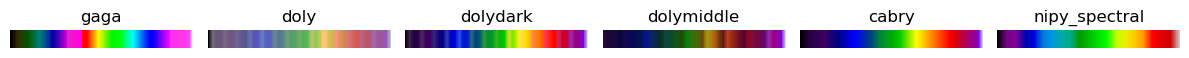

In [23]:
gaga = mcolors.LinearSegmentedColormap.from_list('gaga', np.loadtxt(os.path.join(colormap_path, 'gaga-colormap.txt')), N=256)
doly = mcolors.LinearSegmentedColormap.from_list('doly', np.loadtxt(os.path.join(colormap_path, 'doly-colormap.txt')), N=256)
dolydark = mcolors.LinearSegmentedColormap.from_list('dolydark', np.loadtxt(os.path.join(colormap_path, 'dolydark-colormap.txt')), N=256)
dolymiddle = mcolors.LinearSegmentedColormap.from_list('dolydmiddle', np.loadtxt(os.path.join(colormap_path, 'dolymiddle-colormap.txt')), N=256)
cabry = mcolors.LinearSegmentedColormap.from_list('cabry', np.loadtxt(os.path.join(colormap_path, 'cabry-colormap.txt')), N=2**10)

x = np.linspace(0, 1, 2560)
y = np.linspace(0, 1, 256)
X, Y = np.meshgrid(x, y)

# Affichage des dégradés de couleur pour les trois colormaps
fig, axs = plt.subplots(1, 6, figsize=(12, 6))

for ax, cmap, title in zip(axs, [gaga, doly, dolydark, dolymiddle, cabry, 'nipy_spectral'],
                           ['gaga', 'doly','dolydark', 'dolymiddle', 'cabry', 'nipy_spectral']):
    ax.imshow(X, cmap=cmap)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()

# Pour éviter d'avoir des soucis lorsque l'on affiche le nom d'une cmap custom
def get_colormap_name(cmap):
    if isinstance(cmap, str):
        return cmap
    else:
        return cmap.name

##### Constantes & Paramètres

> Toutes ces valeurs sont des valeurs par défaut, ou des paramètres généraux utilisés dans le code. Les valeurs défauts sont changées automatiquement selon les différentes configurations de simulation choisies.

In [26]:
# Valeurs par défaut
DPI = 100 # Qualité en point par pouce # defaut:100 des valeurs plus basses accélèrent le temps de rendu, conseillé: 82
FPS = 25 # Frames par seconde # recommandé: 25
CMAP = cabry # gaga / 'nipy_spectral' / doly / dolydark / dolymiddle / cabry # Choix du color-map
INTERP = 'bicubic' # Les deux interpolations utilisées fréquement
INTERP2 = 'hanning' # 'nearest'

N = 350 # hauteur du graphique # Taille recommandée 300/400
M = N # largeur du graphique # Carré recommandé

dt = 0.1 # "écart de temps" # recommandé: 0.1
R = 13 # valeur défaut, correspond au nombre de cellule par rayon de Kernel

##### Import des espèces particulières pour l'initialisation

> Les fichiers .npy permettant l'import d'éspèces sont inclus dans le package.

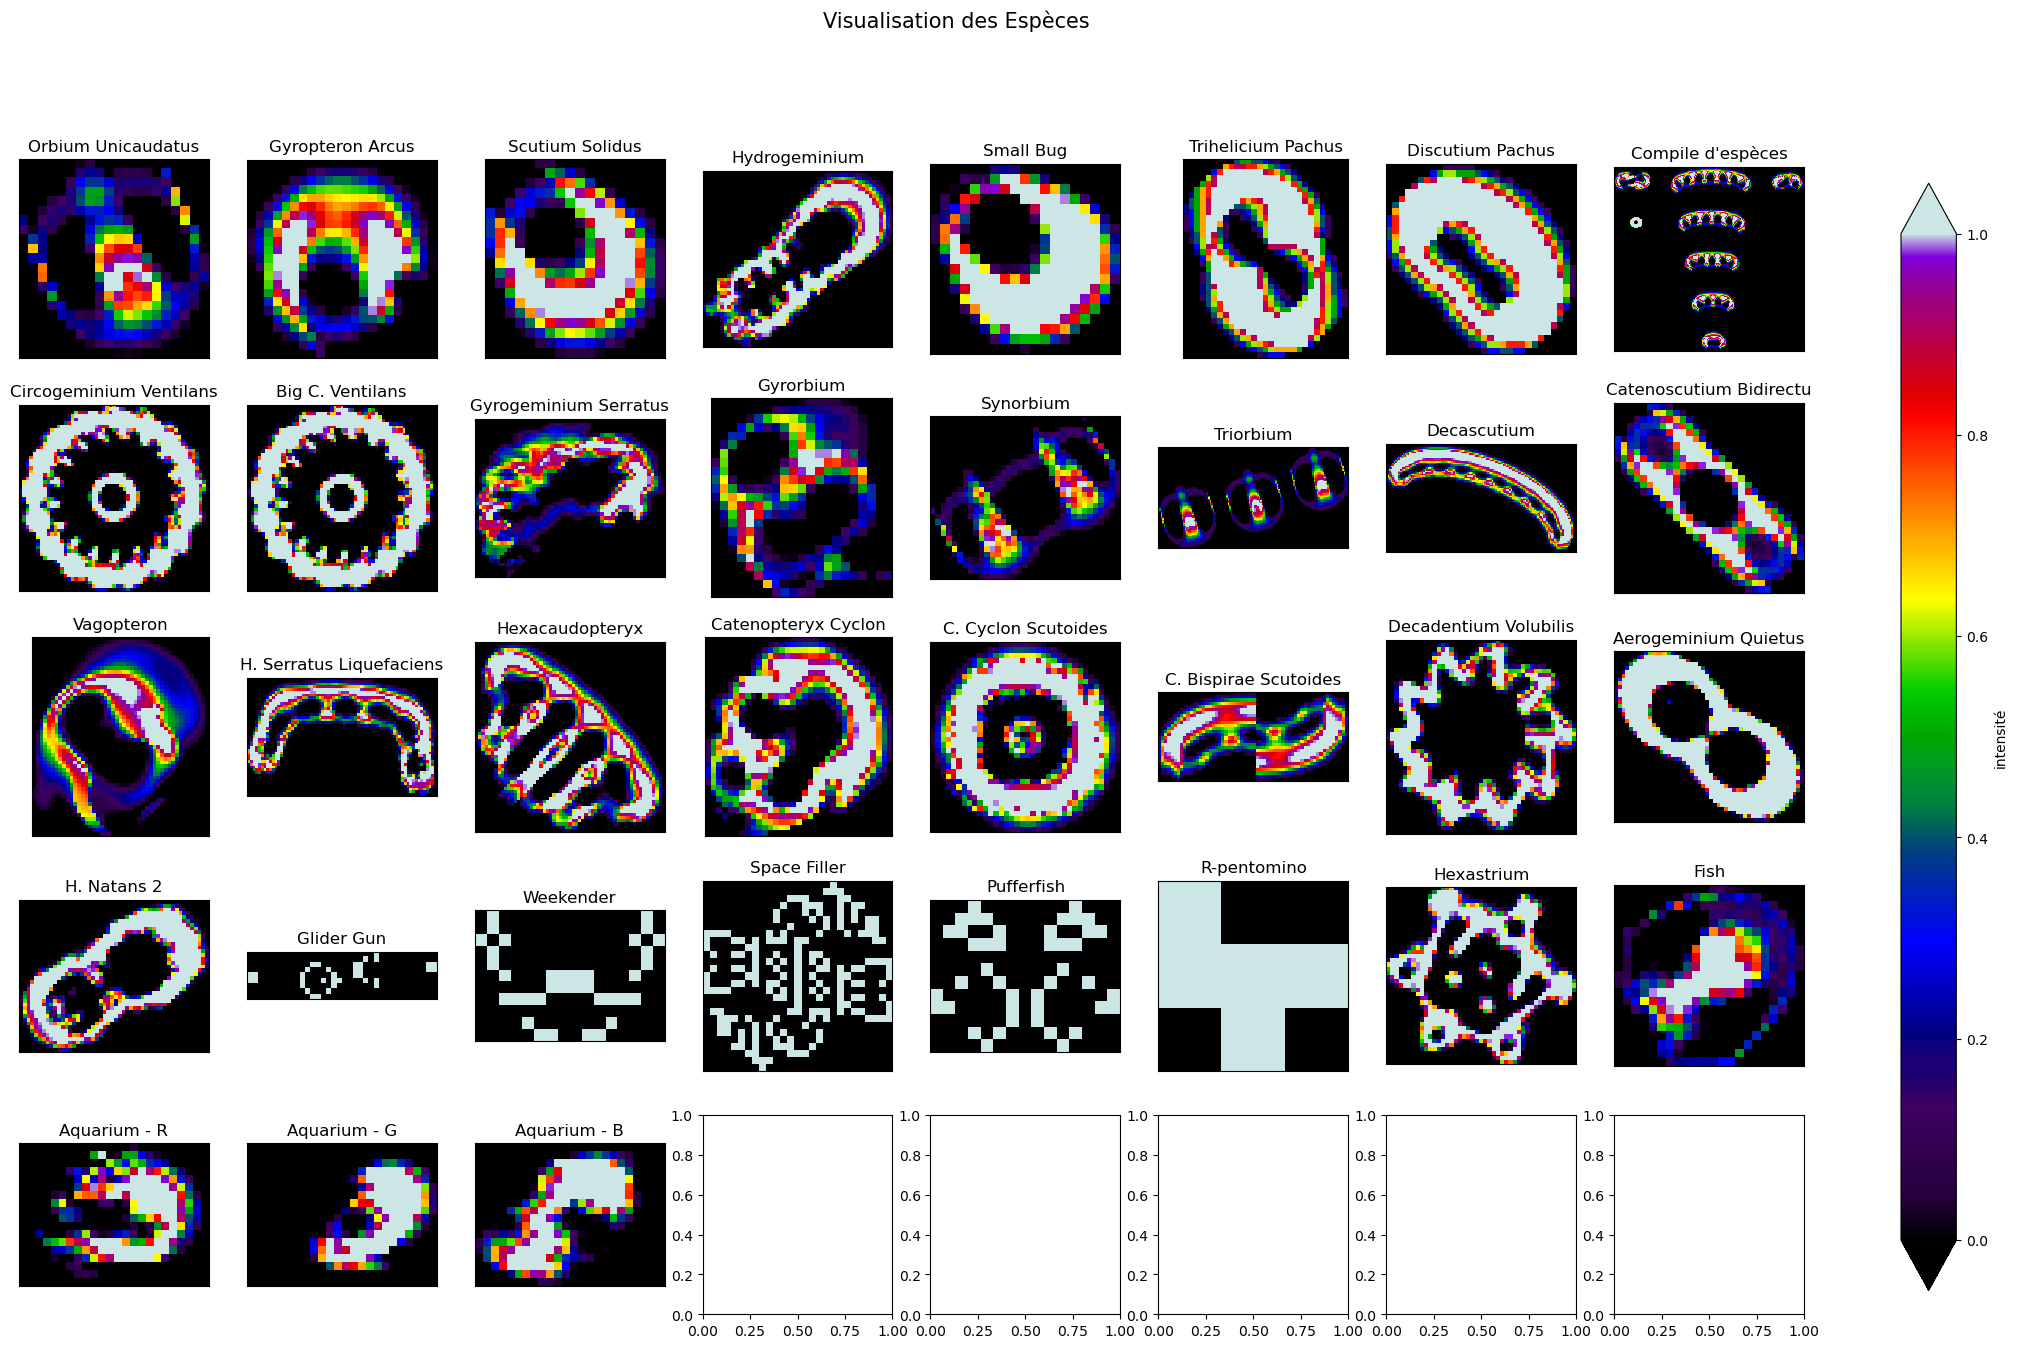

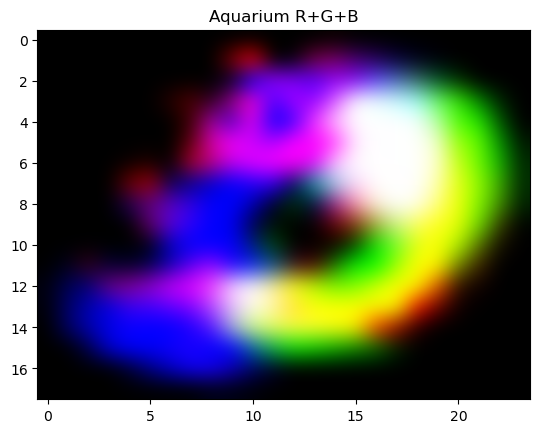

In [29]:
species_files = [ # nom du fichier et paramètres associées
    "Orbium_unicaudatus2.npy",             # R = 13 ; k = bump4()              ; d = gaus(0.15, 0.017) * 0.1
    "Gyropteron_arcus.npy",                # R = 26 ; k = bump4()              ; d = gaus(0.293, 0.0511) * 0.1
    "Scutium_solidus.npy",                 # R = 26 ; k = bump4()              ; d = gaus(0.29, 0.043) * 0.1
    "Hydrogeminium.npy",                   # R = 18 ; k = quad4(1/2,1,2/3)     ; d = quad4(0.26, 0.036) * 0.1
    "SmallBug.npy",                        # R = 13 ; k = bump4()              ; d = gaus(0.31, 0.048) * 0.1
    "TriheliciumPachus.npy",               # R = 13 ; k = stpz1/4()            ; d = stpz(0.46, 0.119) * 0.1
    "DiscutiumPachus.npy",                 # R = 13 ; k = stpz1/4()            ; d = stpz(0.545, 0.186) * 0.1
    "Compilation.npy",                     # R = 13 ; k = bump4()              ; d = gaus(0.337, 0.057) * 0.1
    "CircogeminiumVentilans.npy",          # R = 18 ; k = quad4(1,1,1)         ; d = quad4(0.29, 0.035) * 0.1
    "BigCircogeminiumVentilans.npy",       # R = 45 ; k = quad4(1,1,1)         ; d = quad4(0.29, 0.035) * 0.1
    "GyrogeminiumSerratus.npy",            # R = 36 ; k = quad4(1/2,1,1/2)     ; d = quad4(0.24, 0.03) * 0.1
    "Gyrorbium.npy",                       # R = 13 ; k = bump4()              ; d = gaus(0.156, 0.0224) * 0.1
    "Synorbium.npy",                       # R = 26 ; k = bump4()              ; d = gaus(0.152, 0.0156) * 0.1
    "Triorbium.npy",                       # R = 26 ; k = bump4()              ; d = gaus(0.114, 0.0115) * 0.1
    "Decascutium.npy",                     # R = 26 ; k = bump4()              ; d = gaus(0.48, 0.108) * 0.1
    "CatenoscutiumBidirectus.npy",         # R = 26 ; k = bump4()              ; d = gaus(0.29, 0.043) * 0.1
    "Vagopteron.npy",                      # R = 52 ; k = bump4()              ; d = gaus(0.218, 0.0351) * 0.1
    "HeptapteryxSerratusLiquefaciens.npy", # R = 20 ; k = quad4(3/4,1,1)       ; d = quad4(0.34, 0.051) * 0.1
    "Hexacaudopteryx.npy",                 # R = 26 ; k = quad4()              ; d = quad4(0.35, 0.048) * 0.1
    "CatenopteryxCyclon.npy",              # R = 26 ; k = bump4()              ; d = gaus(0.34, 0.045) * 0.2
    "CatenopteryxCyclonScutoides.npy",     # R = 26 ; k = bump4()              ; d = gaus(0.38, 0.07) * 0.2
    "CatenoheliciumBispiraeScutoides.npy", # R = 26 ; k = bump4()              ; d = gaus(0.407, 0.0806) * 0.1
    "DecadentiumVolubilis.npy",            # R = 72 ; k = quad4(2/3,1,2/3,1/3) ; d = gaus(0.15, 0.014) * 0.1
    "AerogeminiumQuietus.npy",             # R = 18 ; k = quad4(1,1,1)         ; d = quad4(0.3, 0.048) * 0.1
    "HydrogeminiumNatans2.npy",            # R = 36 ; k = quad4(1,1,1)         ; d = quad4(0.26, 0.036) * 0.1
    "GliderGun.npy",                       # R = 2  ; k = life()               ; d = stpz(0.35, 0.07) * 1
    "Weekender.npy",                       # R = 2  ; k = life()               ; d = stpz(0.35, 0.07) * 1
    "SpaceFiller.npy",                     # R = 2  ; k = life()               ; d = stpz(0.35, 0.07) * 1
    "Pufferfish.npy",                      # R = 2  ; k = life()               ; d = stpz(0.35, 0.07) * 1
    "R-pentomino.npy",                     # R = 2  ; k = life()               ; d = stpz(0.35, 0.07) * 1
    "Hexastrium.npy",                      # R = 96 ; k = quad4(1,1/12,1)      ; d = quad4(0.2, 0.024) * 0.1
    "Fish.npy",                            # R = 10 ; Multiple couples : filter, growth
    "Aquarium_R.npy",                      # R = 12 ; Multiple channels : Red
    "Aquarium_G.npy",                      # R = 12 ; Multiple channels : Green
    "Aquarium_B.npy",                      # R = 12 ; Multiple channels : Blue
]

species_names = [
    "Orbium Unicaudatus",
    "Gyropteron Arcus",
    "Scutium Solidus",
    "Hydrogeminium",
    "Small Bug",
    "Trihelicium Pachus",
    "Discutium Pachus",
    "Compile d'espèces",
    "Circogeminium Ventilans",
    "Big C. Ventilans",
    "Gyrogeminium Serratus",
    "Gyrorbium",
    "Synorbium",
    "Triorbium",
    "Decascutium",
    "Catenoscutium Bidirectu",
    "Vagopteron",
    "H. Serratus Liquefaciens",
    "Hexacaudopteryx",
    "Catenopteryx Cyclon",
    "C. Cyclon Scutoides",
    "C. Bispirae Scutoides",
    "Decadentium Volubilis",
    "Aerogeminium Quietus",
    "H. Natans 2",
    "Glider Gun",
    "Weekender",
    "Space Filler",
    "Pufferfish",
    "R-pentomino",
    "Hexastrium",
    "Fish",
    "Aquarium - R",
    "Aquarium - G",
    "Aquarium - B",
]

species_data = [np.load(os.path.join(initialisation_path, file)) for file in species_files]

Orbium_unicaudatus = species_data[0]
Gyropteron_arcus = species_data[1]
Scutium_solidus = species_data[2]
Hydrogeminium = species_data[3]
Bug = species_data[4]
TriheliciumPachus = species_data[5]
DiscutiumPachus = species_data[6]
Compilation = species_data[7]
CircogeminiumVentilans = species_data[8]
BigCircogeminiumVentilans = species_data[9]
GyrogeminiumSerratus = species_data[10]
Gyrorbium = species_data[11]
Synorbium = species_data[12]
Triorbium = species_data[13]
Decascutium = species_data[14]
CatenoscutiumBidirectus = species_data[15]
Vagopteron = species_data[16]
HeptapteryxSerratusLiquefaciens = species_data[17]
Hexacaudopteryx = species_data[18]
CatenopteryxCyclon = species_data[19]
CatenopteryxCyclonScutoides = species_data[20]
CatenoheliciumBispiraeScutoides = species_data[21]
DecadentiumVolubilis = species_data[22]
AerogeminiumQuietus = species_data[23]
HydrogeminiumNatans2 = species_data[24]
GliderGun = species_data[25]
Weekender = species_data[26]
SpaceFiller = species_data[27]
Pufferfish = species_data[28]
Rpentomino = species_data[29]
Hexastrium = species_data[30]
Fish = species_data[31]
Aquarium_R = species_data[32]
Aquarium_G = species_data[33]
Aquarium_B = species_data[34]

# Affichage des espèces
fig, axs = plt.subplots(5, 8, figsize=(25, 15))
fig.suptitle("Visualisation des Espèces", fontsize=15)
for ax, data, title in zip(axs.ravel(), species_data, species_names):
    im = ax.imshow(data, cmap=CMAP, interpolation='None', vmin=0, vmax=1)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

# Ajout d'une barre de couleur commune
cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=1/35, pad=0.05, extend='both', label='intensité')
plt.show()

aquarium = np.load(os.path.join(initialisation_path,'Aquarium_All.npy'))
Xs = [np.zeros((18, 24)) for _ in range(3)]
for c in range(3):
    Xs[c][0:0 + aquarium[c].shape[0], 0:0 + aquarium[c].shape[1]] = aquarium[c]
plt.figure()
plt.title('Aquarium R+G+B')
plt.imshow(np.dstack(Xs), cmap=CMAP, interpolation=INTERP)

---

#### Configuration de la simulation

##### Fonctions usuelles

In [33]:
# Définir une fonction gaussienne 2D
def gauss(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

# Définir une fonction gaussienne 3D
def gauss3D(x, y, mu_x, mu_y, sigma_x, sigma_y):
    return np.exp(-0.5 * (((x - mu_x) / sigma_x)**2 + ((y - mu_y) / sigma_y)**2))

# Définir une vraie fonction gaussienne
def gaussvrai(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

# Générer un vecteur de 3 éléments avec des valeurs aléatoires dont la somme est égale à 1
def vect3():
    a = np.random.rand()
    b = np.random.rand() * (1 - a)
    c = 1 - a - b
    return [a, b, c]

# Générer un vecteur de n éléments avec des valeurs aléatoires dont la somme est égale à 1
def vectn(n):
    values = np.random.rand(n)
    values /= values.sum()
    return np.array(values.tolist())

# Nettoyer une chaîne en supprimant les parenthèses avec des nombres, "(unworking)" et les espaces
def clean(string):
    string = re.sub(r'\(\d+\)', '', string)
    string = string.replace("(unworking)", "")
    string = string.replace(" ", "")
    return string

# Dénaturer une chaîne en ajoutant des espaces avant les lettres majuscules et en remplaçant "-" et "_" par des espaces
def unclean(string):
    string = re.sub(r'(?<!^)(?=[A-Z])', ' ', string)
    string = string.replace("-", " ").replace("_", " ")
    return string

def transform_grid(grid):
    N, M = len(grid), len(grid[0])
    
    # Assumant que N et M sont pairs
    mid_N, mid_M = N // 2, M // 2
    
    # Extraction des parties A, B, C, D
    A = grid[:mid_N, :mid_M]
    B = grid[:mid_N, mid_M:]
    C = grid[mid_N:, :mid_M]
    D = grid[mid_N:, mid_M:]
    
    # Reconstruction de la nouvelle grille [[D, C], [B, A]]
    top_row = np.concatenate((D, C), axis=1)
    bottom_row = np.concatenate((B, A), axis=1)
    new_grid = np.concatenate((top_row, bottom_row), axis=0)
    
    return new_grid

##### Definition des Kernels

In [35]:
def trimodal(rings=[1, 1, 1], r=R):
    nb_rings = len(rings)
    y, x = np.ogrid[-r:r, -r:r]
    distance = np.sqrt((x)**2 + (y)**2) / r
    # distance = distance * nb_rings
    B1, B2, B3 = rings
    h = np.abs(distance)
    def c(h):
        alpha = 4
        k = 4 * h * (1 - h)
        return k**alpha
    h_new = np.copy(h)
    mask1 = (h < 1/3)
    mask2 = (h >= 1/3) & (h < 2/3)
    mask3 = (h >= 2/3) & (h < 1)
    
    h_new[mask1] = B1 * c(3 * h[mask1])
    h_new[mask2] = B2 * c(3 * h[mask2] - 1)
    h_new[mask3] = B3 * c(3 * h[mask3] - 2)
    h_new[h >= 1] = 0
    return h_new

def Multiring(rings=[1/2, 1, 2/3], r=R): # fonction pour un kernel multiring
    global nb_rings
    nb_rings = len(rings)
    pos_y, pos_x = N // 2, M // 2
    y, x = np.ogrid[-r:r, -r:r]
    distance = np.sqrt(x**2 + y**2) / r
    distance = distance * nb_rings
    K_lenia = np.zeros_like(distance)
    for i in range(nb_rings):
        masque = (distance.astype(int) == i)
        K_lenia += masque * rings[i] * gauss(distance %1, 0.5, 0.15) # %1 pour centrer le gaussien sur la grille
    K_lenia = K_lenia / np.sum(K_lenia)
    return K_lenia

def MultipleGrowth(rings=[0.5, 1, 0.667], r=R):
    bs = [[1,5/12,2/3],[1/12,1],[1]]
    ms = [0.156,0.193,0.342]
    ss = [0.0118,0.049,0.0891]
    ring_strengths = [0.5, 1, 0.667]
    nb_rings = len(ring_strengths)
    y, x = np.ogrid[-r:r, -r:r]
    fKs = []
    for b in bs:
        distance = np.sqrt(x**2 + y**2) / R * len(b)
        K = np.zeros_like(distance)
        mu = 0.5
        sigma = 0.15
        for i in range(len(b)):
            mask = (distance.astype(int) == i)
            K += mask * b[i] * gauss(distance%1, mu, sigma)
        fK = np.fft.fft2(np.fft.fftshift(K / np.sum(K)))
        fKs.append(fK)
    # return fKs
    K_lenia = np.zeros_like(distance)
    for a in (0, nb_rings-1):
        K_lenia += ring_strengths[a]*np.real(fKs[a])
    return transform_grid(np.clip(K_lenia, 0, 1))


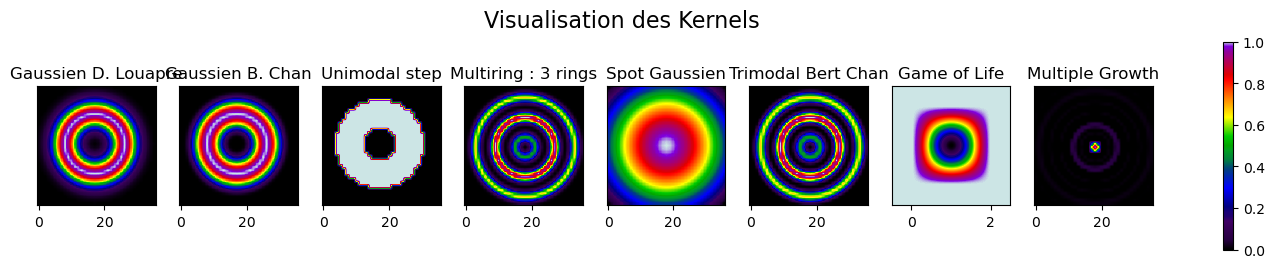

In [77]:
def Kernel_choice(K, rings=[0.5, 1, 0.67], r=R):
    global R
    # print(K, rings, r)
    y, x = np.ogrid[-r:r, -r:r]
    distance = np.sqrt((x+1)**2 + (y+1)**2) / r
    if K == 1: # Kernel Simple Gaussien David Louapre
        alpha = 4
        MU = 0.5
        SIGMA = 0.15
        K_lenia = gauss(distance, MU, SIGMA)
        K_lenia[distance > 1] = 0
        K_lenia = K_lenia / np.sum(K_lenia)  # Normalisation
        return K_lenia
    
    elif K == 2: # Kernel simple gaussien Bert Chan
        alpha = 4
        epsilon = 1e-10
        distance_clipped = np.clip(distance, epsilon, 1 - epsilon)  # Pour éviter la division par zéro
        K_lenia = np.exp(alpha * (1 - 1 / (4 * distance_clipped * (1 - distance_clipped))))
        K_lenia[distance > 1] = 0
        K_lenia = K_lenia / np.sum(K_lenia)  # Normalisation
        return K_lenia
    
    elif K == 3: # Kernel unimodal par step (unworking)
        q = 1/4
        K_lenia = np.where((q <= distance) & (distance <= 1 - q), 1, 0)
        # K_lenia = K_lenia / np.sum(K_lenia)
        return K_lenia
    
    elif K == 4: # Kernel multiring
        return Multiring(rings, r)
    
    elif K == 5: # Kernet Spot gaussien (unworking)
        y, x = np.ogrid[-r:r+1, -r:r+1]
        K_lenia = np.exp(-((x**2 + y**2) / (2 * r**2)))
        K_lenia[K_lenia < np.finfo(K_lenia.dtype).eps * K_lenia.max()] = 0
        return K_lenia / K_lenia.sum()
    
    elif K == 6: # Kernel Trimodal (unworking)
        return trimodal(rings, r)
    
    elif K == 7: # Game of life
        K_lenia = np.array([[1,1,1],[1,0,1],[1,1,1]])
        return K_lenia
    
    elif K == 8: # Multiple couples (filter,growth)
        K_lenia = (MultipleGrowth(rings=[1/2, 1, 2/3], r=r))
        return K_lenia
    
    else:
        raise ValueError("Invalid kernel type")

kernels = [Kernel_choice(K, rings=[0.5, 1, 0.67], r=18) for K in range(1, 9)]
titles = ['Gaussien D. Louapre', 'Gaussien B. Chan', 
          'Unimodal step', f'Multiring : {nb_rings} rings', 
          'Spot Gaussien', 'Trimodal Bert Chan', 'Game of Life', 'Multiple Growth']

figs, axs = plt.subplots(1, 8, figsize=(18, 3))
figs.suptitle("Visualisation des Kernels", fontsize=16, x=0.45, y=0.95)
for ax, kernel, title in zip(axs, kernels, titles):
    im = ax.imshow(kernel, cmap=CMAP, interpolation=INTERP2)
    ax.set_title(title)
    ax.set_yticks([])

cbar = plt.colorbar(im, ax=axs, shrink=0.9, norm=mcolors.Normalize(vmin=0, vmax=1))
plt.show()

##### Definition des fonctions delta et d'évolution

In [38]:
def growth_lenia(X, m, s):
    return 2 * gauss(X, m, s) - 1

# Fonction pour faire évoluer le motif lenia en utilisant un noyau simple
def evolve_lenia(X, m, s, K_lenia):
    U = sp.signal.convolve2d(X, K_lenia, mode='same', boundary='wrap')  # Opération de convolution
    X = np.clip(X + dt * growth_lenia(U, m, s), 0, 1)  # Mettre à jour le motif avec la fonction de croissance et restreindre les valeurs
    return X

# Fonction pour faire évoluer le motif lenia en utilisant une évolution optimisée pour un noyau multi-anneaux
def evolve_hydro(X, m, s, K_lenia):
    fK = np.pad(K_lenia, ((M - len(K_lenia)) // 2, (N - len(K_lenia[0])) // 2), mode='constant')  # Remplir le noyau pour correspondre à la taille du motif
    fK = np.fft.fft2(np.fft.fftshift(fK))  # Effectuer une transformation de Fourier rapide 2D
    U = np.real(np.fft.ifft2(fK * np.fft.fft2(X)))  # Calculer la partie réelle de l'inverse de la FFT du produit du noyau transformé et du motif
    X = np.clip(X + dt * growth_lenia(U, m, s), 0, 1)  # Mettre à jour le motif avec la fonction de croissance et restreindre les valeurs
    return X

# Fonction pour faire évoluer le motif lenia en utilisant une évolution optimisée pour un noyau multi-anneaux avec FFT
def evolve_fft(X, m, s, K_lenia):
    fK = np.pad(K_lenia, ((M - len(K_lenia)) // 2, (N - len(K_lenia[0])) // 2), mode='constant')  # Remplir le noyau pour correspondre à la taille du motif
    fK = np.fft.fft2(np.fft.fftshift(fK))  # Effectuer une transformation de Fourier rapide 2D
    potential_fft = np.fft.fft2(X) * fK  # Calculer la FFT du motif multiplié par le noyau transformé
    potential = np.fft.fftshift(np.real(np.fft.ifft2(potential_fft)))  # Calculer la partie réelle de l'inverse de la FFT décalée du potentiel FFT
    X = np.clip(X + dt * gauss(potential, m, s), 0, 1)  # Mettre à jour le motif avec la fonction de croissance et restreindre les valeurs
    return X

# Fonction pour faire évoluer le motif en utilisant les règles de SmoothLife (non entièrement implémenté)
def smoothlife(X, m, s, K_lenia, B=[0.257, 0.336], D=[0.365, 0.549]):
    ZR = sp.signal.convolve2d(X, K_lenia, mode='same', boundary='wrap')  # Opération de convolution
    birth = np.logical_and(ZR > B[0], ZR < B[1])  # Calculer les conditions de naissance
    death = np.logical_and(ZR > D[0], ZR < D[1])  # Calculer les conditions de décès
    newX = np.where(birth, 1, X)  # Mettre à jour le motif en fonction des conditions de naissance
    newX = np.where(death, 0, newX)  # Mettre à jour le motif en fonction des conditions de décès
    X = np.clip((1 - dt) * X + dt * newX, 0, 1)  # Mettre à jour le motif avec de nouvelles valeurs et restreindre les valeurs
    return X

# Fonction pour faire évoluer le motif en utilisant les règles du jeu de la vie de Conway
def GameOfLife(X, m, s, K_lenia):
    neighbors = sp.signal.convolve2d(X, K_lenia, mode='same', boundary='wrap')  # Opération de convolution pour calculer les voisins
    newGrid = np.where((X == 1) & ((neighbors < 2) | (neighbors > 3)), 0, X)  # Appliquer les règles pour les cellules vivantes
    newGrid = np.where((X == 0) & (neighbors == 3), 1, newGrid)  # Appliquer les règles pour les cellules mortes
    X[:] = newGrid  # Mettre à jour le motif avec la nouvelle grille
    return X

def evolve_multiple_couples(X, ms=[0.156,0.193,0.342], ss=[0.0118,0.049,0.0891], K_lenia=[]):
    dt = 0.1
    bs = [[1,5/12,2/3],[1/12,1],[1]]
    ms = [0.156,0.193,0.342]
    ss = [0.0118,0.049,0.0891]
    R = 10
    ring_strengths = [0.5, 1, 0.667]
    nb_rings = len(ring_strengths)
    fhs_y = N // 2 
    fhs_x = M // 2
    y, x = np.ogrid[-fhs_y:fhs_y, -fhs_x:fhs_x]
    fKs = []
    for b in bs:
        distance = np.sqrt(x**2 + y**2) / R * len(b)
        K = np.zeros_like(distance)
        mu = 0.5
        sigma = 0.15
        for i in range(len(b)):
            mask = (distance.astype(int) == i)
            K += mask * b[i] * gauss(distance%1, mu, sigma)
        fK = np.fft.fft2(np.fft.fftshift(K / np.sum(K)))
        fKs.append(fK)
    Us = [np.real(np.fft.ifft2(fK * np.fft.fft2(X))) for fK in fKs]
    Gs = [2*gauss(U, ms[i], ss[i]) - 1 for i,U in enumerate(Us)]
    X = np.clip(X + dt * np.mean(Gs, axis=0), 0, 1)
    return X

##### Fonction de création de la vidéo

In [40]:
def produce_movie(X, evolve, m, s, K_lenia, save_path, mode='normal',
                  num_steps=100, cmap=None, interpolation=INTERP):
    if len(X.shape) == 2 and cmap is None:
        cmap = 'gray_r'
    
    start_time = time.time()  # Enregistrer le temps de début de la génération de la vidéo
    
    # Créer une nouvelle figure pour l'animation
    fig = plt.figure(constrained_layout=True)
    im = plt.imshow(X, cmap=cmap, interpolation=interpolation, vmin=0, vmax=1)  # Afficher l'image initiale
    plt.axis('off')  # Désactiver les axes
    cbar = plt.colorbar(label='Intensité', shrink=0.7, extend='both', spacing='proportional')  # Ajouter une barre de couleur avec une étiquette
    cbar.ax.patch.set_alpha(0.5)  # Définir la transparence de la barre de couleur

    # Définir le titre de la figure en fonction du mode et du numéro de fichier
    title = f"Simulation de Lenia : {'f(X)' if mode == 'normal' else 'k * f(X)' if mode == 'conv' else 'd(k * f(X))'} - n°{num_file+1}"
    plt.title(title)  # Afficher le titre

    convolved_images = []  # Initialiser une liste pour stocker les images convoluées
    if mode in ['conv', 'delta']:  # Vérifier si le mode est convolution ou delta
        progress_bar_preprocessing = tqdm(total=num_steps, desc="Pré-traitement", unit="tab", colour='blue', leave=False)  # Initialiser une barre de progression
        for _ in range(num_steps):  # Boucler sur le nombre d'étapes spécifié
            grid = evolve(X, m, s, K_lenia)  # Obtenir la grille évoluée en utilisant la fonction d'évolution
            convolved_grid = sp.signal.convolve2d(grid, K_lenia, mode='same', boundary='wrap')  # Convoluer la grille avec le noyau
            if mode == 'delta':  # Vérifier si le mode est delta
                convolved_grid = evolve(convolved_grid, m, s, K_lenia)  # Appliquer une autre étape d'évolution
            convolved_images.append(convolved_grid)  # Ajouter l'image convoluée à la liste
            X[:] = np.clip(grid, 0, 1)  # Mettre à jour la variable X avec la grille évoluée
            progress_bar_preprocessing.update(1)  # Mettre à jour la barre de progression
        progress_bar_preprocessing.close()  # Fermer la barre de progression

    # Créer une barre de progression pour le processus de génération de la vidéo
    progress_bar_video = tqdm(total=num_steps, desc="Progression", unit="img", colour='green', leave=False)

    # Initialiser une liste vide pour les annotations
    annotations = []

    # Définir une fonction pour mettre à jour les images de l'animation
    def update(i):
        progress_bar_video.update(1)  # Mettre à jour la barre de progression pour chaque image

        # Supprimer toutes les annotations existantes
        while annotations:
            annotation = annotations.pop()
            annotation.remove()

        # Mettre à jour l'animation en fonction du mode sélectionné
        if mode == 'normal':
            if i > 0:
                nonlocal X  # Utiliser le mot-clé nonlocal pour modifier la variable X de la portée externe
                grid = evolve(X, m, s, K_lenia)  # Faire évoluer la grille en fonction des paramètres spécifiés
                im.set_array(grid)  # Définir le tableau d'images sur la grille évoluée
                X[:] = grid  # Mettre à jour la variable X avec la grille évoluée
        else:
            im.set_array(convolved_images[i])  # Définir le tableau d'images sur l'image pré-convoluée à l'index i

        # Ajouter des annotations pour le numéro d'image actuel et le temps
        annotation1 = plt.annotate(f"Image {i+1}/{num_steps}", xy=(0.02, 0.96), xycoords='axes fraction',
                                   path_effects=[path_effects.withStroke(linewidth=1, foreground='black')],
                                   fontsize=8, color='white')
        annotation2 = plt.annotate(f"{(i+1)/FPS}/{np.round(num_steps/FPS,2)} s", xy=(0.02, 0.02), xycoords='axes fraction',
                                   path_effects=[path_effects.withStroke(linewidth=1, foreground='black')],
                                   fontsize=8, color='white')
        annotations.extend([annotation1, annotation2])  # Ajouter les annotations à la liste
        return im,  # Renvoyer le tableau d'images mis à jour

    # Créer une animation basée sur la fonction de mise à jour et les paramètres spécifiés
    ani = animation.FuncAnimation(fig, update, num_steps, interval=50, blit=True)
    ani.save(os.path.join(simulation_path, save_path), writer='pillow', fps=FPS, dpi=DPI)  # Enregistrer l'animation en tant que vidéo
    progress_bar_video.close()  # Fermer la barre de progression pour la génération de la vidéo

    # Calculer et afficher le temps total pris pour la génération de la vidéo
    global total_time  # Déclarer la variable total_time comme globale
    end_time = time.time()  # Obtenir l'heure actuelle comme heure de fin
    total_time = end_time - start_time  # Calculer le temps total pris
    if total_time > 60:
        print(f"Temps total pris pour générer la vidéo : {np.round(total_time/60, 2)} minutes")  # Afficher le temps total en minutes
    else:
        print(f"Temps total pris pour générer la vidéo : {np.round(total_time, 2)} secondes")  # Afficher le temps total en secondes

##### Fonction pour le nommage du fichier

> Les fichiers seront nommés selon cette structure : \
> $\quad$ LeniaSimulation-{$Numéro ~ simulation$}-{$Initialisation$}-R{$Rayon ~ Kernel$}mu{$\mu$}sigma{$\sigma$}kernel{$Numéro ~ de ~ Kernel$}.gif

In [43]:
# Nom du fichier

def file_path(name='x', R='x', mu='x', sigma='x', Kernel='x', supp=''):
    file_prefix = "LeniaSimulation"
    file_format = ".gif"
    parameter = f'R{R}mu{mu}sigma{sigma}kernel{Kernel}'
    if supp == '':
        return f"{file_prefix}-{num_file + 1}-{name}-{parameter}{file_format}"
    else:
        return f"{file_prefix}-{num_file + 1}-{supp}{name}-{parameter}{file_format}"

##### Fonctions d'initialisation

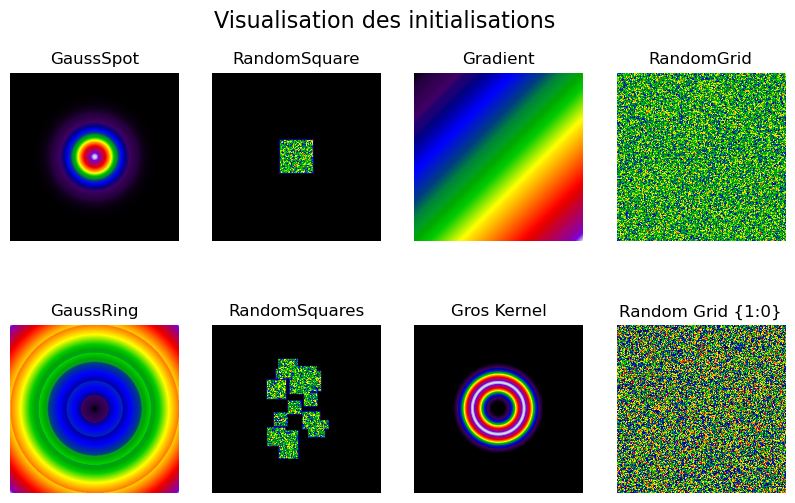

In [45]:
# Definition des fonctions d'initialisation

def GaussSpot():
    radius = 36
    y, x = np.ogrid[-N//2:N//2, -M//2:M//2]
    grid = gauss3D(x, y, 0, 0, radius, radius)
    return grid

def CenterData(data, flip=False, N=N, M=M):
    grid = np.zeros((N, M))
    start_x = (M - data.shape[1]) // 2
    start_y = (N - data.shape[0]) // 2
    grid[start_y:(start_y + data.shape[0]), start_x:(start_x + data.shape[1])] = data
    if flip:
        grid = np.flipud(grid)
    return grid

def PlaceData(data, hor, vert, flip=False, N=N, M=M): 
    grid = np.zeros((N, M))
    # Calcul des positions en fonction des options verticales et horizontales
    if hor == 'left':
        pos_x = int(M * 0.1)
    elif hor == 'right':
        pos_x = int(M * 0.9) - data.shape[1]
    else:
        raise ValueError("Invalid horizontal position")
        
    if vert == 'top':
        pos_y = int(N * 0.1)
    elif vert == 'bottom':
        pos_y = int(N * 0.9) - data.shape[0]
    else:
        raise ValueError("Invalid vertical position")
    grid[pos_y:(pos_y + data.shape[0]), pos_x:(pos_x + data.shape[1])] = data
    
    if flip:
        grid = np.flipud(grid)
        
    return grid

def TwoPLace(data, flip=False, N=N, M=M):
    grid = PlaceData(data, 'left', 'top', flip, N, M) + PlaceData(data, 'right', 'bottom', flip, N, M)
    return grid

def AllPLace(data):
    grid = PlaceData(data, 'top', 'right') + PlaceData(data, 'bottom', 'left') + PlaceData(data, 'top', 'left') + PlaceData(data, 'bottom', 'right')
    return grid

def RandomSquare(size=0.2):
    np.random.seed()
    pom = int((N+M)/2 * (1-size))
    grid = np.zeros((N, M))
    pos_x = (N - (N - pom)) // 2
    pos_y = (M - (M - pom)) // 2
    grid[pos_x:pos_x + (N - pom), pos_y:pos_y + (M - pom)] = np.random.rand(N - pom, M - pom)
    return grid

def GaussRing(mu=0.29, sigma=0.043):
    y, x = np.ogrid[-N//2:N//2, -M//2:M//2]
    k1, k2, k3 = 1/2, 1/3, 1/4
    rings = [k1, k2, k3]
    nb_rings = len(rings)
    grid = np.sqrt(x**2 + y**2) / (N//2) * nb_rings
    for i in range(nb_rings):
        masque = (grid.astype(int) == i)
        grid += masque * rings[i] * np.exp(-((x % 1)**2 + (y % 1)**2) / (2 * sigma**2))
    grid = grid / np.max(grid)
    return grid

def RandomSquares(mu, sigma, num_squares):
    radius = min(M//2, N//2) * 0.5
    min_size = radius / 5
    max_size = radius / 2
    grid = np.zeros((N, M))
    for _ in range(num_squares):
        size = np.random.uniform(min_size, max_size)
        x_center = np.random.randint(M)
        y_center = np.random.randint(N)
        while ((x_center - M//2)**2 + (y_center - N//2)**2) > radius**2:
            x_center = np.random.randint(M)
            y_center = np.random.randint(N)
        x_start = max(0, int(x_center - size/2))
        y_start = max(0, int(y_center - size/2))
        x_end = min(M, int(x_center + size/2))
        y_end = min(N, int(y_center + size/2))
        grid[y_start:y_end, x_start:x_end] = np.random.rand(y_end - y_start, x_end - x_start)
    return grid

def Gradient():
    x, y = np.meshgrid(np.arange(M), np.arange(N))
    grid = (x + y) / max(N, M) / 2
    return grid

def RandomGrid(N=N, M=M):
    grid = np.random.rand(N, M)
    return grid

def KernelAlea(N=N, M=M):
    mop = np.random.choice([1, 2, 4, 5])
    # print(mop)
    grid = CenterData(Kernel_choice(mop, rings=vectn(3), r = 2*(N+M)//R), flip=False)
    return grid

def RandomGrid10(N=N, M=M):
    density = 0.5
    grid = np.random.choice([0, 1], size=(N, M), p=[1-density, density])
    return grid

def AleaPlein(Tab, K, N=N, M=M):
    min_distance = 16
    grid = np.zeros((N, M))
    n, m = Tab.shape
    placed_positions = []  # Liste pour stocker les positions déjà placées
    
    for _ in range(K):
        if rd.choice([True, False]):
            Tab = np.flip(Tab, axis=0)  # Inversion des lignes
        if rd.choice([True, False]):
            Tab = np.flip(Tab, axis=1)  # Inversion des colonnes
        
        valid_position = False
        while not valid_position:
            x = rd.randint(0, N - n)
            y = rd.randint(0, M - m)
            valid_position = True
            
            for pos in placed_positions:
                if abs(x - pos[0]) < min_distance or abs(y - pos[1]) < min_distance:
                    valid_position = False
                    break
                if valid_position:
                    for i in range(n):
                        for j in range(m):
                            if Tab[i][j] != 0 and grid[x+i][y+j] != 0:
                                valid_position = False
                                break
                        if not valid_position:
                            break
        
        placed_positions.append((x, y))
        grid[x:x+n, y:y+m] += Tab
            
    return grid

fig, axs = plt.subplots(2, 4, figsize=(10, 6))
fig.suptitle("Visualisation des initialisations", fontsize=16, x=0.5, y=0.95)

initializations = {
    "GaussSpot": GaussSpot(),
    "RandomSquare": RandomSquare(),
    "Gradient": Gradient(),
    "RandomGrid": RandomGrid(),
    "GaussRing": GaussRing(),
    "RandomSquares": RandomSquares(0.15, 0.017, 15),
    "Gros Kernel": KernelAlea(),
    "Random Grid {1:0}": RandomGrid10()
}

for ax, (title, grid) in zip(axs.flatten(), initializations.items()):
    ax.imshow(grid, cmap=CMAP, interpolation=INTERP2)
    ax.set_title(title)
    ax.axis('off')

plt.show()

##### Dialogue des choix

In [47]:
choices = [
        " (1) Gaussian Spot",
        " (2) Orbium Unicaudatus",
        " (3) Random",
        " (4) Random Big Square",
        " (5) Gyropteron Arcus (unworking)",
        " (6) Scutium Solidus",
        " (7) Hydrogeminium Natans",
        " (8) Random with N-rings Kernel",
        " (9) Multiples Rings Gaussian",
        "(10) Random Smalls Squares",
        "(11) Gradient",
        "(12) Small Bug (unworking)",
        "(13) Random Square SmoothLife (unworking)",
        "(14) Compilation d'espèces",
        "(15) Trihelicium Pachus (unworking)",
        "(16) Discutium Pachus (unworking)",
        "(17) Circogeminium Ventilans",
        "(18) Gyrogeminium Serratus",
        "(19) Kernel Aléatoire (unworking)"
        "(20) Triorbium",
        "(21) Decascutium",
        "(22) Catenoscutium Bidirectu",
        "(23) Vagopteron",
        "(24) Heptapteryx Serratus Liquefaciens",
        "(25) Hexacaudopteryx",
        "(26) Catenopteryx Cyclon",
        "(27) Catenohelicium Cyclon Scutoides",
        "(28) Catenohelicium Bispirae Scutoides",
        "(29) Decadentium Volubilis",
        "(30) Aerogeminium Quietus",
        "(31) Hydrogeminium Natans 2",
        "(32) Random - Game of Life",
        "(33) Glider Gun - Game of Life",
        "(34) Weekender - Game of Life",
        "(35) Space Filler - Game of Life",
        "(36) Pufferfish - Game of Life",
        "(37) R-pentomino - Game of Life",
        "(38) Hexastrium",
        "(39) Fish",
]

choice = 1
frame = 10
choice_conv = 'a'

def asking(choix='', image='', forme=''):
    if choix == '' and image == '' and forme =='':
        # Affichage des choix d'initialisation
        print("Choisissez l'initialisation :")
        for i in choices:
            print(f"  {i}")

        while True:
            global choice
            global frame
            global choice_conv
            choice = input('Entrez votre choix : ')
            if choice == 'stop':
                break
            elif choice in [str(i) for i in range(1, len(choices)+2)]:
                # Validation de l'entrée pour le nombre d'images
                while True:
                    frame = input('Combien d\'images voulez-vous générer ? ')
                    if frame == 'stop':
                        break
                    try:
                        frame = int(frame)
                        if frame > 0:
                            if frame > 30000:
                                print(" -> Entrée invalide. Veuillez entrer un nombre moins élevé.")
                            else:
                                # Affichage des choix d'affichage
                                print('Quel affichage voulez-vous ?')
                                print('   (a) Normal : f(X)')
                                print('   (b) Somme du Voisinage : k * f(X)')
                                print('   (c) Delta de la Somme du Voisinage : d(k * f(X))')
                                print('   (d) Tous')

                                # Validation de l'entrée pour le choix de convolution
                                while True:
                                    choice_conv = input('Entrez votre choix : ')
                                    if choice_conv == 'stop':
                                        break
                                    elif choice_conv in ['a', 'b', 'c','d']:
                                        # print("\nLes entrées sont valides.")
                                        break
                                    else:
                                        print(" -> Entrée invalide. Veuillez entrer 'a', 'b', 'c' ou 'd'.")
                                break
                        else:
                            print(" -> Seules les informations d'initialisation seront affichées.")
                            break
                    except ValueError:
                        if frame == 'stop':
                            break
                        print(" -> Entrée invalide. Veuillez entrer un nombre entier.")
                break
            else:
                print(f" -> Entrée invalide. Veuillez entrer un nombre entre 1 et {len(choices)+1}")
    else:
        choice = choix
        frame = image
        choice_conv = forme
    print('\n')

stop = choice == 'stop' or frame == 'stop' or choice_conv == 'stop'

##### Configurations

In [49]:
EntityInfo = Dict[str, Any]

config: Dict[str, EntityInfo] = {
    '1': {
        'mu': 0.15, 'sigma': 0.017, 'name': 'GaussianSpot', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: GaussSpot()
    },
    '2': {
        'mu': 0.15, 'sigma': 0.017, 'name': 'OrbiumUnicaudatus', 'R': 13, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: TwoPLace(Orbium_unicaudatus)
    },
    '3': {
        'mu': 0.15, 'sigma': 0.017, 'name': 'Random', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: RandomGrid()
    },
    '4': {
        'mu': 0.31, 'sigma': 0.049, 'name': 'RandomSquare', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: RandomSquare()
    },
    '5': {
        'mu': 0.293, 'sigma': 0.0511, 'name': 'GyropteronArcus', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: PlaceData(Gyropteron_arcus, 'left', 'top', True)
    },
    '6': {
        'mu': 0.29, 'sigma': 0.043, 'name': 'ScutiumSolidus', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: PlaceData(Scutium_solidus, 'left', 'top')
    },
    '7': {
        'mu': 0.26, 'sigma': 0.036, 'name': 'HydrogeminiumNatans', 'R': 18, 'kernel': 4,
        'rings': [1/2, 1, 2/3], 'evolve': evolve_hydro, 'init': lambda: PlaceData(Hydrogeminium, 'left', 'top')
    },
    '8': {
        'mu': 0.26, 'sigma': 0.036, 'name': 'RandomNrings', 'R': 26, 'kernel': 4,
        'rings': vectn(rd.randint(2, 7)), 'evolve': evolve_hydro, 'init': lambda: RandomSquare()
    },
    '9': {
        'mu': 0.29, 'sigma': 0.027, 'name': 'MutlipleRings', 'R': 26, 'kernel': 4,
        'rings': vectn(3), 'evolve': evolve_hydro, 'init': lambda: GaussRing(0.29, 0.043)
    },
    '10': {
        'mu': 0.15, 'sigma': 0.017, 'name': 'RandomSquares', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: RandomSquares(0.15, 0.017, 15)
    },
    '11': {
        'mu': 0.1, 'sigma': 0.15, 'name': 'Gradient', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: Gradient()
    },
    '12': {
        'mu': 0.31, 'sigma': 0.048, 'name': 'SmallBug', 'R': 13, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: PlaceData(Bug, 'left', 'top')
    },
    '13': {
        'mu': 0.31, 'sigma': 0.049, 'name': 'SmoothLifeRandomSquares', 'R': 13, 'kernel': 5,
        'rings': [], 'evolve': smoothlife, 'init': lambda: RandomSquares(0.31, 0.049, 9)
    },
    '14': {
        'mu': 0.337, 'sigma': 0.057, 'name': 'Compilation', 'R': 13, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(Compilation)
    },
    '15': {
        'mu': 0.46, 'sigma': 0.119, 'name': 'TriheliciumPachus', 'R': 13, 'kernel': 3,
        'rings': [], 'evolve': smoothlife, 'init': lambda: PlaceData(TriheliciumPachus, 'left', 'top')
    },
    '16': {
        'mu': 0.545, 'sigma': 0.186, 'name': 'DiscutiumPachus', 'R': 13, 'kernel': 3,
        'rings': [], 'evolve': smoothlife, 'init': lambda: PlaceData(DiscutiumPachus, 'left', 'top')
    },
    '17': {
        'mu': 0.29, 'sigma': 0.035, 'name': 'CircogeminiumVentilans', 'R': 45, 'kernel': 4,
        'rings': [1, 1, 1], 'evolve': evolve_hydro, 'init': lambda: CenterData(BigCircogeminiumVentilans)
    },
    '18': {
        'mu': 0.27, 'sigma': 0.04, 'name': 'GyrogeminiumSerratus', 'R': 36, 'kernel': 4,
        'rings': [1/2, 1, 1/2], 'evolve': evolve_hydro, 'init': lambda: CenterData(GyrogeminiumSerratus)
    },
    '19': {
        'mu': round(np.random.uniform(0.1, 0.5), 3), 'sigma': round(np.random.uniform(0.01, 0.18), 3), 'name': 'KernelAleatoire',
        'R': np.random.randint(13, 37), 'kernel': np.random.randint(1, 6), 'rings': vectn(3), 'evolve': evolve_hydro, 'init': lambda: KernelAlea()
    },
    '20': {
        'mu': 0.114, 'sigma': 0.0115, 'name': 'Triorbium', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(Triorbium)
    },
    '21': {
        'mu': 0.48, 'sigma': 0.108, 'name': 'Decascutium', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(Decascutium)
    },
    '22': {
        'mu': 0.29, 'sigma': 0.043, 'name': 'CatenoscutiumBidirectus', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(CatenoscutiumBidirectus)
    },
    '23': {
        'mu': 0.218, 'sigma': 0.0351, 'name': 'Vagopteron', 'R': 52, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(Vagopteron)
    },
    '24': {
        'mu': 0.34, 'sigma': 0.051, 'name': 'HeptapteryxSerratusLiquefaciens', 'R': 20, 'kernel': 4,
        'rings': [3/4, 1, 1], 'evolve': evolve_hydro, 'init': lambda: CenterData(HeptapteryxSerratusLiquefaciens)
    },
    '25': {
        'mu': 0.35, 'sigma': 0.048, 'name': 'Hexacaudopteryx', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(Hexacaudopteryx)
    },
    '26': {
        'mu': 0.34, 'sigma': 0.045, 'name': 'CatenopteryxCyclon', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(CatenopteryxCyclon)
    },
    '27': {
        'mu': 0.38, 'sigma': 0.07, 'name': 'CatenopteryxCyclonScutoides', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(CatenopteryxCyclonScutoides)
    },
    '28': {
        'mu': 0.407, 'sigma': 0.0806, 'name': 'CatenoheliciumBispiraeScutoides', 'R': 26, 'kernel': 1,
        'rings': [], 'evolve': evolve_lenia, 'init': lambda: CenterData(CatenoheliciumBispiraeScutoides)
    },
    '29': {
        'mu': 0.15, 'sigma': 0.014, 'name': 'DecadentiumVolubilis', 'R': 72, 'kernel': 4,
        'rings': [2/3, 1, 2/3, 1/3], 'evolve': evolve_hydro, 'init': lambda: CenterData(DecadentiumVolubilis)
    },
    '30': {
        'mu': 0.3, 'sigma': 0.048, 'name': 'AerogeminiumQuietus', 'R': 18, 'kernel': 4,
        'rings': [1, 1, 1], 'evolve': evolve_hydro, 'init': lambda: CenterData(AerogeminiumQuietus)
    },
    '31': {
        'mu': 0.26, 'sigma': 0.036, 'name': 'HydrogeminiumNatans2', 'R': 36, 'kernel': 4,
        'rings': [1, 1, 1], 'evolve': evolve_hydro, 'init': lambda: PlaceData(HydrogeminiumNatans2, 'left', 'bottom')
    },
    '32': {
        'mu': 0.35, 'sigma': 0.07, 'name': 'RandomGameOfLife', 'R': 2, 'kernel': 7,
        'rings': [], 'evolve': GameOfLife, 'init': lambda: RandomGrid10(N=100, M=100)
    },
    '33': {
        'mu': 0.35, 'sigma': 0.07, 'name': 'GliderGun', 'R': 2, 'kernel': 7,
        'rings': [], 'evolve': GameOfLife, 'init': lambda: CenterData(GliderGun, N=100, M=100)
    },
    '34': {
        'mu': 0.35, 'sigma': 0.07, 'name': 'Weekender', 'R': 2, 'kernel': 7,
        'rings': [], 'evolve': GameOfLife, 'init': lambda: CenterData(Weekender, N=100, M=100)
    },
    '35': {
        'mu': 0.35, 'sigma': 0.07, 'name': 'SpaceFiller', 'R': 2, 'kernel': 7,
        'rings': [], 'evolve': GameOfLife, 'init': lambda: CenterData(SpaceFiller, N=256, M=256)
    },
    '36': {
        'mu': 0.35, 'sigma': 0.07, 'name': 'Pufferfish', 'R': 2, 'kernel': 7,
        'rings': [], 'evolve': GameOfLife, 'init': lambda: CenterData(Pufferfish, N=200, M=200)
    },
    '37': {
        'mu': 0.35, 'sigma': 0.07, 'name': 'R-pentomino', 'R': 2, 'kernel': 7,
        'rings': [], 'evolve': GameOfLife, 'init': lambda: CenterData(Rpentomino, N=200, M=200)
    },
    '38': {
        'mu': 0.2, 'sigma': 0.024, 'name': 'Hexastrium', 'R': 96, 'kernel': 4,
        'rings': [1, 1/12, 1], 'evolve': evolve_hydro, 'init': lambda: CenterData(Hexastrium)
    },
    '39': {
        'mu': [0.156,0.193,0.342], 'sigma': [0.0118,0.049,0.0891], 'name': 'Fish', 'R': 10, 'kernel': 8,
        'rings': [1/2, 1, 2/3], 'evolve': evolve_multiple_couples,
        'init': lambda: AleaPlein(Fish, 10)
    }
}

##### Fonction de lancement de la simulation

In [51]:
def simulation(choix='', image='', forme=''): 
    """
    choix : choix de l'initialisation
    image :  nombre d'image(s) à génerer
    forme : choix de la visualisation
    """
    asking(choix, image, forme) # dialogue de demande

    global frame, mu, frame, rings, X, k_choice, num_file, tab, stop, CMAP, dt, DPI, total_time
    
    if choice in config: # attitrage des variables
        cfg = config[choice]
        mu, sigma = cfg['mu'], cfg['sigma']
        R = cfg['R']
        name = cfg['name']
        X = cfg['init']()
        k_choice = cfg['kernel']
        rings = cfg['rings']
        K_lenia = Kernel_choice(k_choice, rings, R)
        evolve_func = cfg['evolve']
        
        if choice in ['32', '33', '34', '35', '36', '37']:
            interpolation = 'none'
            interpolation2 = 'none'
        else:
            interpolation = INTERP
            interpolation2 = INTERP2

        # Affichage d'une figure avec le kernel l'initialisation et les paramètres de simulation
        fig = plt.figure(figsize=(12, 4.2))
        fig.suptitle("Choix d'initialisation et de Simulation", fontsize=16, x=0.45, y=0.95)
        gs = fig.add_gridspec(1, 4, width_ratios=[1, 1, 0.06, 1])

        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        cbar_ax = fig.add_subplot(gs[0, 2])
        ax_info = fig.add_subplot(gs[0, 3])

        im0 = ax0.imshow(K_lenia, cmap=CMAP, interpolation=interpolation2)
        ax0.set_title(f'Kernel choisi: K{k_choice}')
        ax0.set_yticks([])

        if choice_conv == 'b':
            affichage = ' Convolution : $k * f(X)$'
            SHOW = np.clip(sp.signal.convolve2d(X, K_lenia, mode='full', boundary='wrap'), 0, 1)
        elif choice_conv == 'c':
            affichage = ' Delta : $d(k * f(X))$'
            SHOW = np.clip(evolve_func(sp.signal.convolve2d(X, K_lenia, mode='same', boundary='wrap'), mu, sigma, K_lenia), 0, 1)
        elif choice_conv == 'a':
            affichage = ' Normal : $f(X)$'
            SHOW = X
        elif choice_conv == 'd':
            affichage = ' Tous les affichages ont été choisis.\n $f(X)$ affiché par défaut.'
            SHOW = X
        else :
            affichage ='error'
            SHOW = X

        im1 = ax1.imshow(SHOW, cmap=CMAP, interpolation=interpolation, vmin=0, vmax=1)
        ax1.set_title('Initialisation choisie')
        ax1.set_yticks([])

        cbar = fig.colorbar(im1, cax=cbar_ax, shrink=0.7, extend='both')
        cbar.ax.set_ylabel('Intensité')

        # Paramètres de simulation (text)
        info_text = (
            f"Simulation n°{num_file + 1}\n\n"
            f"Nom de l'initialisation choisie :\n"
            f" {unclean(name)}\n \n"
            f"mu = {mu} ; sigma = {sigma} ; dt = {dt}\n"
            f"R = {R} ; rings = {np.round(rings,2)} \n \n"
            f"Numéro de Kernel : K{k_choice}\n \n"
            f"Nombre d'images : {frame}\n \n"
            f"Taille du graphe : [{np.shape(X)[0]}:{np.shape(X)[1]}]\n"
            f"DPI = {DPI} ; fps = {FPS}\n \n"
            f"ColorMap: {get_colormap_name(CMAP)}\n\n"
            f"Type d'affichage : \n"
            f"{affichage}"
                    )

        ax_info.text(0.05, 0.5, info_text, va='center', ha='left', fontsize=11)
        ax_info.axis('off')  # Pour enlever les axes du subplot d'info

        plt.tight_layout()
        plt.show()

        # Génération de la vidéo
        if frame != 0:
            if tab[0] is not None:
                print(f"\nDémarrage de la simulation...\n\nIl faut compter environ {tab[0]} s par images.")
                temps = np.round(frame*tab[0] if choice_conv != 'd' else frame*5*tab[0],2)
                if temps > 60:
                    print(f"Le chargement devrait prendre environ {np.round(temps/60,2)} minutes.")
                else:
                    print(f"Le chargement devrait prendre environ {np.round(temps,2)} secondes.")
                print("Ces valeurs sont basées sur les temps des dernières simulations.\nElles peuvent être peu fiables car de nombreux facteurs peuvent varier d'une simulation à l'autre.")

            X1, X2, X3 = np.zeros_like(X), np.zeros_like(X), np.zeros_like(X)
            X1[:], X2[:], X3[:] = X, X, X
            
            if choice_conv == 'a':
                produce_movie(X, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice), mode='normal', num_steps=frame, cmap=CMAP, interpolation=interpolation)
            elif choice_conv == 'b':
                produce_movie(X, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Conv'), mode='conv', num_steps=frame, cmap=CMAP, interpolation=interpolation)
            elif choice_conv == 'c':
                produce_movie(X, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Delta'), mode='delta', num_steps=frame, cmap=CMAP, interpolation=interpolation)
            elif choice_conv == 'd':
                print(' La simulation risque de durer un moment, vous avez choisi de générer les trois affichages pour la même initialisation.')
                print(' Vous pouvez aller vous faire un café en attendant (seulement si vous avez défini un nombre de frame élevé et puis si vous aimez ça).')
                produce_movie(X1, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice), mode='normal', num_steps=frame, cmap=CMAP, interpolation=interpolation)
                produce_movie(X2, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Conv'), mode='conv', num_steps=frame, cmap=CMAP, interpolation=interpolation)
                produce_movie(X3, evolve_func, mu, sigma, K_lenia, file_path(name, R, mu, sigma, k_choice, 'Delta'), mode='delta', num_steps=frame, cmap=CMAP, interpolation=interpolation)
            else:
                print(" -> Erreur dans lors du choix de l'affichage ou du nombre d'images")
            
            event = total_time / frame
            
            if tab[0] is None:
                tab[0] = np.round(event, 2)
            else:
                ratioT = np.abs(total_time - temps) / np.sqrt(temps**2 + total_time**2)
                # tab[0] = np.round(tab[0] * (1 - ratioT), 2)
                tab[0] = np.round((tab[0] * tab[1] + event) / (tab[1] + 1), 2)
            
            if tab[1] > 10:
                tab[1] = 1 # Pour ne pas monter dans de trop hautes valeurs
            else:
                tab[1] += 1 # Ajout de 1 à l'effectif de calcul de temps

            print('\nSimulation terminé !\n')

            plt.show()

            print('\nSauvegarde en cours.\n')
            
            tab[2] += 1 # Ajout de 1 au numérotage des fichiers
            num_file = tab[2]
            
            np.save('tab.npy', tab) # sauvegarde de tab pour une prochaine simulation
    elif stop:
        pass
    else:
        print(" -> Erreur dans lors du choix de l'initialisation")

---

#### Lancement de la simulation

> Cellule qui permet de démarrer la simulation. 

```python
simulation(choix='choix initialisation', image='nombre image', forme='affichage')
# exmple : simulation(choix='17', image=348, forme='b')
```

> Pour ouvrir l'interface de dialogue pour le choix :
```python
simulation()
```

In [55]:
# simulation(choix='15', image=10, forme='a')

# simulation()

----